<a href="https://www.kaggle.com/code/azminetoushikwasi/all-imputation-techniques-with-pros-and-cons?scriptVersionId=131118632" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Different Types Imputation Techniques : Tutorial

<div style="padding:20px;color:white;margin:0;font-size:350%;text-align:center;display:fill;border-radius:5px;background-color:#8c1707;overflow:hidden;font-weight:500">Different Types Imputation Techniques : Tutorial</div>

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#d13621;overflow:hidden;font-weight:500">What is Imputation?</div>

# 1. What is Imputation?

In statistics, imputation is the process of replacing missing data with substituted values. When substituting for a data point, it is known as "unit imputation"; when substituting for a component of a data point, it is known as "item imputation".
Imputation is a technique used for replacing the missing data with some substitute value to retain most of the data/information of the dataset. These techniques are used because removing the data from the dataset every time is not feasible and can lead to a reduction in the size of the dataset to a large extend, which not only raises concerns for biasing the dataset but also leads to incorrect analysis.

![](https://editor.analyticsvidhya.com/uploads/63685Imputation.JPG)

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#d13621;overflow:hidden;font-weight:500">Why Imputation is Important?</div>

# 2. Why Imputation is Important?

- **Incompatible with most of the Python libraries used in Machine Learning**:- Yes, you read it right. While using the libraries for ML(the most common is skLearn), they don’t have a provision to automatically handle these missing data and can lead to errors.
- **Distortion in Dataset**:- A huge amount of missing data can cause distortions in the variable distribution i.e it can increase or decrease the value of a particular category in the dataset.
- **Affects the Final Model**:- the missing data can cause a bias in the dataset and can lead to a faulty analysis by the model.

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#d13621;overflow:hidden;font-weight:500">Imputation Tecniques Discussed</div>

# 3. Imputation Tecniques Discussed

#### 1. Complete Case Analysis(CCA)
#### 2. Arbitrary Value Imputation
#### 3. Frequent Category Imputation
#### 4. statistical Values imputation
#### 5. Using a linear regression
#### 6. Iterative imputation
#### 7. Nearest neighbors imputation
#### 8. Marking imputed values

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#d13621;overflow:hidden;font-weight:500">Exploring Datasets</div>

In [1]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import json
import random
import sys

In [2]:
df=pd.read_csv("/kaggle/input/tabular-playground-series-jun-2022/data.csv")
submission = pd.read_csv("/kaggle/input/tabular-playground-series-jun-2022/sample_submission.csv", index_col='row-col')

df=df[:1000]

warnings.filterwarnings('ignore')

# 4. Basic Exploration

In [3]:
print("Data Shape: There are {:,.0f} rows and {:,.0f} columns.\nMissing values = {}, Duplicates = {}.\n".
      format(df.shape[0], df.shape[1],df.isna().sum().sum(), df.duplicated().sum()))

Data Shape: There are 1,000 rows and 81 columns.
Missing values = 963, Duplicates = 0.



<AxesSubplot:>

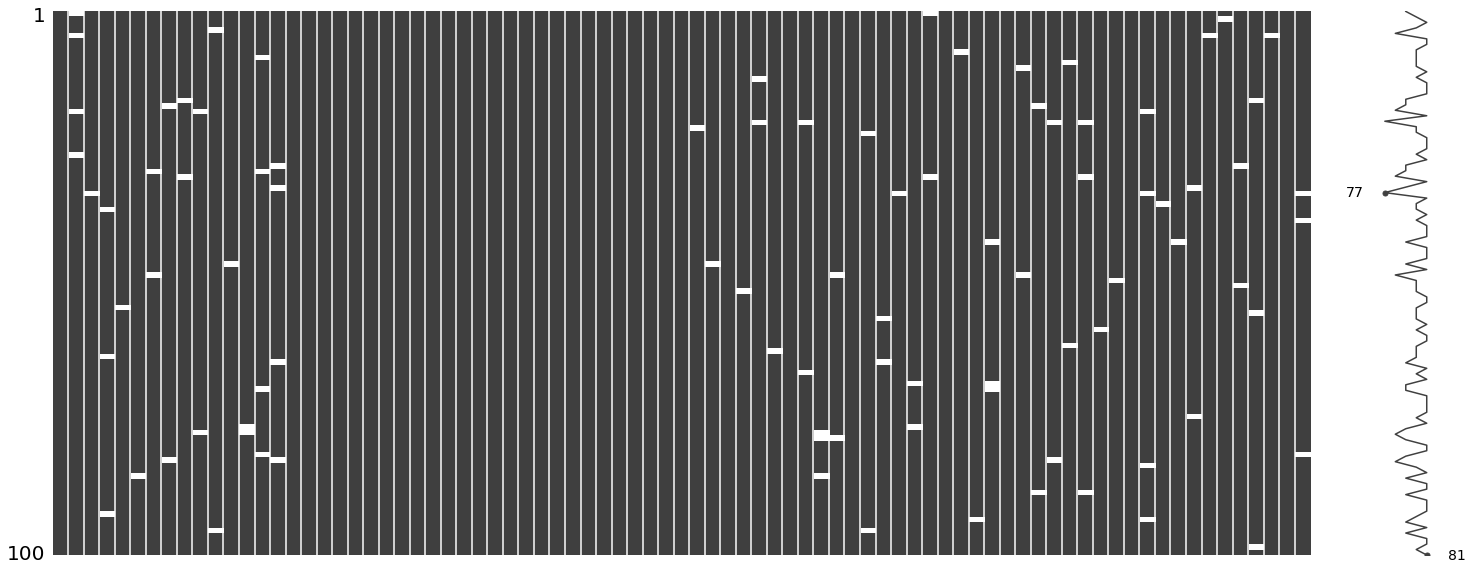

In [4]:
import missingno as msno
msno.matrix(df.sample(100))

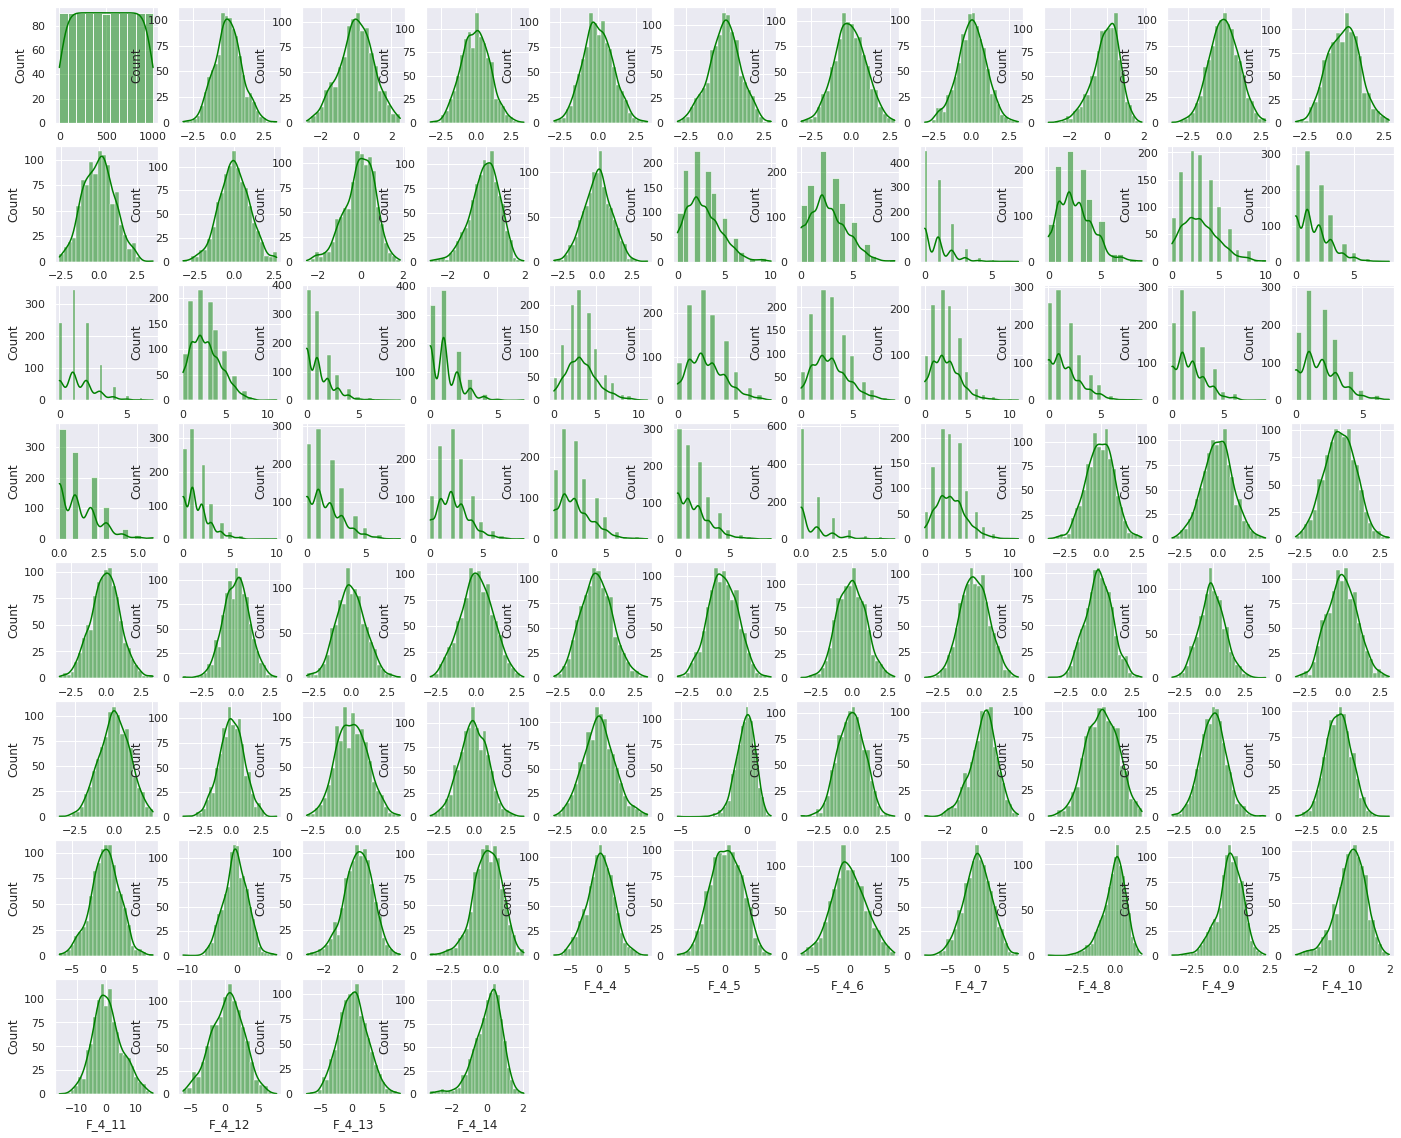

In [5]:
sns.set(rc={'figure.figsize':(24,20)})
for i, column in enumerate(list(df.columns), 1):
    plt.subplot(8,11,i)
    p=sns.histplot(x=column,data=df.sample(1000),stat='count',kde=True,color='green')

## Very interesting co-relations!

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#d13621;overflow:hidden;font-weight:500">Imputation Tecniques Discussed</div>

# 5. Imputation Techniques of Different Types of Variables.

![](https://editor.analyticsvidhya.com/uploads/30381Imputation%20Techniques%20types.JPG)

<div style="padding:5px;color:black;margin:0;font-size:185%;text-align:left;display:fill;border-radius:5px;background-color:#daf0ec;overflow:hidden;font-weight:500">Estimators that handle NaN values</div>

Some estimators are designed to handle NaN values without preprocessing. Below is the list of these estimators, classified by type (cluster, regressor, classifier, transform) :

<p></br></p>
<div style="padding:5px;color:black;margin:0;font-size:150%;text-align:left;display:fill;border-radius:5px;background-color:#daf0ec;overflow:hidden;font-weight:500">Estimators that allow NaN values for type regressor:</div>

- HistGradientBoostingRegressor

<p></br></p>
<div style="padding:5px;color:black;margin:0;font-size:150%;text-align:left;display:fill;border-radius:5px;background-color:#daf0ec;overflow:hidden;font-weight:500">Estimators that allow NaN values for type classifier:</div>

- HistGradientBoostingClassifier

<p></br></p>
<div style="padding:5px;color:black;margin:0;font-size:150%;text-align:left;display:fill;border-radius:5px;background-color:#daf0ec;overflow:hidden;font-weight:500">Estimators that allow NaN values for type transformer :</div>

- IterativeImputer
- KNNImputer
- MaxAbsScaler
- MinMaxScaler
- MissingIndicator
- PowerTransformer
- QuantileTransformer
- RobustScaler
- SimpleImputer
- StandardScaler
- VarianceThreshold

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#f7055e;overflow:hidden;font-weight:500">Complete Case Analysis(CCA)</div>

# >> 1. Complete Case Analysis(CCA)

This is a quite straightforward method of handling the Missing Data, which directly removes the rows that have missing data i.e we consider only those rows where we have complete data i.e data is not missing. This method is also popularly known as “Listwise deletion”.

## Assumptions:-
- Data is Missing At Random(MAR).
- Missing data is completely removed from the table.

## Advantages:- 
- Easy to implement.
- No Data manipulation required.


## Limitations:-
- Deleted data can be informative.
- Can lead to the deletion of a large part of the data.
- Can create a bias in the dataset, if a large amount of a particular type of variable is deleted from it.
- The production model will not know what to do with Missing data.

## When to Use:-
- Data is MAR(Missing At Random).
- Good for Mixed, Numerical, and Categorical data.
- Missing data is not more than 5% – 6% of the dataset.
- Data doesn’t contain much information and will not bias the dataset.

## Code:-

In [6]:
#shape of DF
df.shape

(1000, 81)

In [7]:
## Finding the columns that have Null Values(Missing Data) 
## We are using a for loop for all the columns present in dataset with average null values greater than 0
na_variables = [ var for var in df.columns if df[var].isnull().mean() > 0 ]

In [8]:
data_na = df[na_variables].isnull().mean()
## Implementing the CCA techniques to remove Missing Data
data_cca = df.dropna(axis=0)
## Verifying the final shape of the remaining dataset
data_cca.shape

(374, 81)

## But we won't use it in this competition.

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#f7055e;overflow:hidden;font-weight:500">Arbitrary Value Imputation</div>

# >> 2. Arbitrary Value Imputation

This is an important technique used in Imputation as it can handle both the Numerical and Categorical variables. This technique states that we group the missing values in a column and assign them to a new value that is far away from the range of that column. Mostly we use values like 99999999 or -9999999 or “Missing” or “Not defined” for numerical & categorical variables.

## Assumptions:-
- Data is not Missing At Random.
- The missing data is imputed with an arbitrary value that is not part of the dataset or Mean/Median/Mode of data.

## Advantages:-
- Easy to implement.
- We can use it in production.
- It retains the importance of “missing values” if it exists.

## Disadvantages:-
- Can distort original variable distribution.
- Arbitrary values can create outliers.
- Extra caution required in selecting the Arbitrary value.

## When to Use:-
- When data is not MAR(Missing At Random).
- Suitable for All.

## Code:-

In [9]:
train_df=df.copy()
na_variables = [ var for var in train_df.columns if train_df[var].isnull().mean() > 0 ]

In [10]:
## Here nan represent Missing Data
## Using Arbitary Imputation technique, we will Impute missing Gender with "Missing"  {You can use any other value also}
arb_impute = train_df['F_1_0'].fillna(random.choice(train_df['F_1_0'].unique()))
arb_impute.unique()
#continue for each column

array([-3.545910e-01,  1.380940e+00,  2.560230e-01, -7.284200e-01,
        5.902120e-01,  8.860900e-02,  5.332100e-01, -1.737332e+00,
       -3.349350e-01,  1.441700e-01, -3.577710e-01,  6.966250e-01,
       -1.086734e+00,  3.225980e-01,  7.450050e-01,  3.863070e-01,
        6.414970e-01,  1.749908e+00, -8.816260e-01,  6.510890e-01,
       -8.596610e-01, -8.541390e-01, -1.462049e+00,  4.655450e-01,
       -7.412370e-01, -6.030150e-01, -8.079680e-01, -7.903150e-01,
        1.847430e-01,  6.150610e-01,  5.044220e-01,  9.170340e-01,
       -9.172600e-01, -9.017710e-01, -3.791100e-02, -1.066060e-01,
        1.822102e+00,  1.047250e-01, -4.184400e-01,  6.961190e-01,
       -7.875690e-01, -4.196920e-01,  1.853280e-01,  3.694400e-02,
        1.165708e+00,  1.024840e+00, -8.028310e-01, -1.092970e+00,
        4.932320e-01, -1.199601e+00,  6.220650e-01,  1.109327e+00,
       -1.038472e+00, -1.615246e+00, -2.391810e-01, -2.794150e-01,
       -1.001882e+00, -1.620242e+00,  8.759390e-01, -1.365478e

## But we won't use it in this competition.

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#f7055e;overflow:hidden;font-weight:500">Frequent Category Imputation</div>

# >> 3. Frequent Category Imputation

This technique says to replace the missing value with the variable with the highest frequency or in simple words replacing the values with the Mode of that column. This technique is also referred to as Mode Imputation.

## Assumptions:-
- Data is missing at random.
- There is a high probability that the missing data looks like the majority of the data.

## Advantages:-
- Implementation is easy.
- We can obtain a complete dataset in very little time.
- We can use this technique in the production model.

## Disadvantages:-
- The higher the percentage of missing values, the higher will be the distortion.
- May lead to over-representation of a particular category.
- Can distort original variable distribution.

## When to Use:-
- Data is Missing at Random(MAR)
- Missing data is not more than 5% – 6% of the dataset.

## Code:- 

In [11]:
train_df['F_1_0'].groupby(train_df['F_1_0']).count()

F_1_0
-3.179218    1
-3.069845    1
-2.835210    1
-2.799446    1
-2.678237    1
            ..
 2.675456    1
 2.742528    1
 3.087874    1
 3.331050    1
 3.418586    1
Name: F_1_0, Length: 980, dtype: int64

In [12]:
train_df['F_1_0'].mode()

0     -3.179218
1     -3.069845
2     -2.835210
3     -2.799446
4     -2.678237
         ...   
975    2.675456
976    2.742528
977    3.087874
978    3.331050
979    3.418586
Length: 980, dtype: float64

In [13]:
## Using Frequent Category Imputer
frq_impute = train_df['F_1_0'].fillna('-0.665735')
frq_impute.unique()

#continue for each column

array([-0.354591, 1.38094, 0.256023, -0.72842, 0.590212, 0.088609,
       0.53321, -1.737332, -0.334935, 0.14417, -0.357771, 0.696625,
       -1.086734, 0.322598, 0.745005, 0.386307, 0.641497, 1.749908,
       -0.881626, 0.651089, -0.859661, '-0.665735', -1.462049, 0.465545,
       -0.741237, -0.603015, -0.807968, -0.790315, 0.184743, 0.615061,
       0.504422, 0.917034, -0.91726, -0.901771, -0.037911, -0.106606,
       1.822102, 0.104725, -0.41844, 0.696119, -0.787569, -0.419692,
       0.185328, 0.036944, 1.165708, 1.02484, -0.802831, -1.09297,
       0.493232, -1.199601, 0.622065, 1.109327, -1.038472, -1.615246,
       -0.239181, -0.279415, -1.001882, -1.620242, 0.875939, -1.365478,
       -1.165679, 1.444728, 0.047678, -0.477133, 0.591323, -0.710569,
       -0.516449, 0.354282, -0.372369, -0.470008, -0.570886, -0.422805,
       -2.400496, 0.830108, -0.208271, -1.000962, -0.108814, 1.122936,
       0.928787, 0.664586, 2.38245, -1.249475, 0.724446, 0.193627,
       -0.459931, -0.9981

## But we won't use it in this competition.

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#f7055e;overflow:hidden;font-weight:500">Statistical Values imputation</div>

# >> 4. statistical Values imputation

This is done using statistical values like mean, median. However, none of these guarantees unbiased data, especially if there are many missing values.

Mean is most useful when the original data is not skewed, while the median is more robust, not sensitive to outliers, and thus used when data is skewed.

 In a normally distributed data, one can get all the values that are within 2 standard deviations from the mean. Next, fill in the missing values by generating random numbers between **(mean — 2 * std) & (mean + 2 * std)**

In [14]:
xdf=df.copy()

average=xdf.F_1_0.mean()
std=xdf.F_1_0.std()
count_nan_age=xdf.F_1_0.isnull().sum()

rand = np.random.randint(average - 2*std, average + 2*std, size = count_nan_age)

print("Before",xdf.F_1_0.isnull().sum())

xdf["F_1_0"][np.isnan(xdf["F_1_0"])] = rand
print("After",xdf.F_1_0.isnull().sum())

Before 20
After 0


<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#f7055e;overflow:hidden;font-weight:500">Using a linear regression</div>

# >> 5. Using a linear regression. 

Based on the existing data, one can calculate the best fit line between two variables, from checking correlations.

It is worth mentioning that linear regression models are sensitive to outliers.

<AxesSubplot:xlabel='F_4_8', ylabel='F_4_11'>

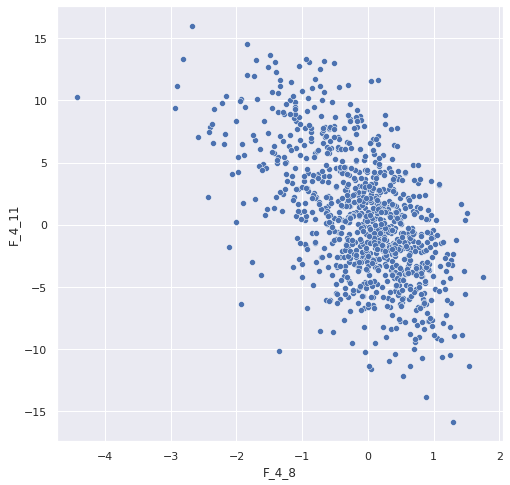

In [15]:
#seeing co-relation
sns.set(rc={'figure.figsize':(8,8)})
sns.scatterplot(data=xdf, x="F_4_8", y="F_4_11",legend="full",sizes=(20, 200))

- Interesting corelation!

In [16]:
print("F_4_11",xdf.F_4_11.isnull().sum())
print("F_4_8",xdf.F_4_8.isnull().sum())

F_4_11 17
F_4_8 19


- Now, we can use liner regression to do it; for each column. We aso can use multiple features for each linear regression too!

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#f7055e;overflow:hidden;font-weight:500">Iterative imputation with XGBoost</div>

# >> 6. Iterative imputation

Iterative imputation refers to a process where each feature is modeled as a function of the other features, e.g. a regression problem where missing values are predicted. Each feature is imputed sequentially, one after the other, allowing prior imputed values to be used as part of a model in predicting subsequent features.

It is iterative because this process is repeated multiple times, allowing ever improved estimates of missing values to be calculated as missing values across all features are estimated.

This approach may be generally referred to as fully conditional specification (FCS) or multivariate imputation by chained equations (MICE).

In [17]:
# loading modules
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import xgboost

data=df.copy()

#setting up the imputer

imp = IterativeImputer(
    estimator=xgboost.XGBRegressor(
        n_estimators=5,
        random_state=1,
        tree_method='gpu_hist',
    ),
    missing_values=np.nan,
    max_iter=5,
    initial_strategy='mean',
    imputation_order='ascending',
    verbose=2,
    random_state=1
)

data[:] = imp.fit_transform(data)
data.shape

[IterativeImputer] Completing matrix with shape (1000, 81)
[IterativeImputer] Ending imputation round 1/5, elapsed time 8.92
[IterativeImputer] Change: 7.870282462849272, scaled tolerance: 0.999 
[IterativeImputer] Ending imputation round 2/5, elapsed time 14.18
[IterativeImputer] Change: 3.0992305278778076, scaled tolerance: 0.999 
[IterativeImputer] Ending imputation round 3/5, elapsed time 19.26
[IterativeImputer] Change: 2.912747859954834, scaled tolerance: 0.999 
[IterativeImputer] Ending imputation round 4/5, elapsed time 24.46
[IterativeImputer] Change: 2.7156333923339844, scaled tolerance: 0.999 
[IterativeImputer] Ending imputation round 5/5, elapsed time 29.65
[IterativeImputer] Change: 3.0690569281578064, scaled tolerance: 0.999 


(1000, 81)

- You can use any other model, too!

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#f7055e;overflow:hidden;font-weight:500">Nearest neighbors imputation</div>

#  >> 7. Nearest neighbors imputation

The KNNImputer class provides imputation for filling in missing values using the k-Nearest Neighbors approach. By default, a euclidean distance metric that supports missing values, nan_euclidean_distances, is used to find the nearest neighbors. Each missing feature is imputed using values from n_neighbors nearest neighbors that have a value for the feature. The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor. If a sample has more than one feature missing, then the neighbors for that sample can be different depending on the particular feature being imputed. When the number of available neighbors is less than n_neighbors and there are no defined distances to the training set, the training set average for that feature is used during imputation. If there is at least one neighbor with a defined distance, the weighted or unweighted average of the remaining neighbors will be used during imputation. If a feature is always missing in training, it is removed during transform. 

In [18]:
from sklearn.impute import KNNImputer
nan = np.nan
X = [[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputed_x=imputer.fit_transform(X)
print(X,imputed_x)

[[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]] [[1.  2.  4. ]
 [3.  4.  3. ]
 [5.5 6.  5. ]
 [8.  8.  7. ]]


<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#f7055e;overflow:hidden;font-weight:500">Marking imputed values</div>

# >> 8. Marking imputed values

The MissingIndicator transformer is useful to transform a dataset into corresponding binary matrix indicating the presence of missing values in the dataset. This transformation is useful in conjunction with imputation. When using imputation, preserving the information about which values had been missing can be informative. Note that both the SimpleImputer and IterativeImputer have the boolean parameter add_indicator (False by default) which when set to True provides a convenient way of stacking the output of the MissingIndicator transformer with the output of the imputer.

NaN is usually used as the placeholder for missing values. However, it enforces the data type to be float. The parameter missing_values allows to specify other placeholder such as integer. In the following example, we will use -1 as missing values:

In [19]:
from sklearn.impute import MissingIndicator
X = np.array([[-1, -1, 1, 3],
              [4, -1, 0, -1],
              [8, -1, 1, 0]])
indicator = MissingIndicator(missing_values=-1)
mask_missing_values_only = indicator.fit_transform(X)
mask_missing_values_only

array([[ True,  True, False],
       [False,  True,  True],
       [False,  True, False]])

- later we can use this to develop a method for imputation.

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#d13621;overflow:hidden;font-weight:500">Comments</div>

# 6. Comments
One can take the random approach where we fill in the missing value with a random value. Taking this approach one step further, one can first divide the dataset into two groups (strata), based on some characteristic, say gender, and then fill in the missing values for different genders separately, at random.

In sequential hot-deck imputation, the column containing missing values is sorted according to auxiliary variable(s) so that records that have similar auxiliaries occur sequentially. Next, each missing value is filled in with the value of the first following available record.

What is more interesting is that 𝑘 nearest neighbour imputation, which classifies similar records and put them together, can also be utilized. A missing value is then filled out by finding first the 𝑘 records closest to the record with missing values. Next, a value is chosen from (or computed out of) the 𝑘 nearest neighbours. In the case of computing, statistical methods like mean (as discussed before) can be used.

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#d13621;overflow:hidden;font-weight:500">Other Related Notebooks</div>

# Other Related Notebooks
- ### [✅ 07 Cross Validation Methods ➡️ Tutorial 📊](https://www.kaggle.com/code/azminetoushikwasi/07-cross-validation-methods-tutorial)
- ### [➡️[Tutorial] 🛠 Feature Engineering ⚙📝](https://www.kaggle.com/code/azminetoushikwasi/tutorial-feature-engineering)
- ### [📋 Bias-Variance Tradeoff ➡️ with NumPy & Seaborn](https://www.kaggle.com/code/azminetoushikwasi/bias-variance-tradeoff-with-numpy-seaborn)

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#d13621;overflow:hidden;font-weight:500">References</div>

# References
- [Defining, Analysing, and Implementing Imputation Techniques](https://www.analyticsvidhya.com/blog/2021/06/defining-analysing-and-implementing-imputation-techniques/)
- [The Ultimate Guide to Data Cleaning](https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4#b498)
- [Scikit Learn Documentation](https://scikit-learn.org/stable/modules/impute.html)
- [TPS Jun 2022 IterativeImputer baseline](https://www.kaggle.com/code/hiro5299834/tps-jun-2022-iterativeimputer-baseline)